## Simple Linear Regression

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, max_error

### For the slide

In [45]:
lst = [1,2,3,4,5]
lst2 = [2.1,6,7.2,7.4,10.2]
print(lst2)
df = pd.DataFrame(list(zip(lst, lst2)),
               columns =['x', 'y'])
df

[2.1, 6, 7.2, 7.4, 10.2]


x     y
0  1   2.1
1  2   6.0
2  3   7.2
3  4   7.4
4  5  10.2

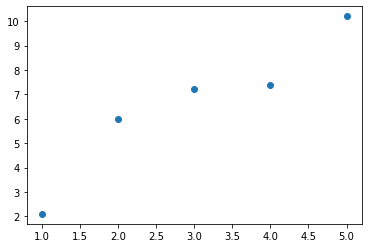

In [46]:
#TODO: Plot the data. Use the matplotlib (plt) method scatter with arguments x_vals,y_vals
#CODE HERE
plt.scatter(df.x,df.y)

In [47]:
#The algorithm requires the data as column vectors
x_vec = np.array(lst).reshape(-1,1)
y_vec = np.array(lst2).reshape(-1,1)

In [48]:
regr = linear_model.LinearRegression()
#TODO: train the LinearRegression object regr using its fit() method with arguments x_train,y_train
#CODE HERE
regr.fit(x_vec,y_vec)

LinearRegression()

In [49]:
#Since this is one dimensional we only have the slope and intercept
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [[1.76]]
Intercept: 
 [1.3]


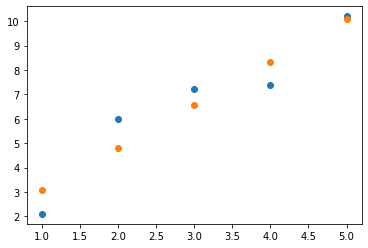

In [50]:
# Drawing the predicted and actual points:
#Actual
plt.scatter(x_vec,y_vec)
#Predicted
plt.scatter(x_vec,x_vec*regr.coef_+regr.intercept_)

In [11]:
#Make predictions using the test set
y_pred = regr.predict(x_test)

In [12]:
#How well did we do?
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Max error: %.2f' % max_error(y_test, y_pred))
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 0.04
Max error: 0.39
Coefficient of determination: 1.00


Notice that the explained r2 is close to 1

# A less perfect regression
Let's do a regression on a set that is not perfectly linear

In [13]:
#sklearn has a repository of datasets we can use
#We load the diabetes dataset
diabetes = datasets.load_diabetes()

In [14]:
#What is the type of the diabetes object?
type(diabetes)

sklearn.utils.Bunch

In [15]:
#List the keys of the Bunch
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [16]:
#Print the description provided for the diabetes object
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [17]:
#Print the feature_names
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [18]:
#We shall examine bow body mass index is related to progression of the disease
#Isolate the data
data = diabetes['data']

In [19]:
data.shape

(442, 10)

In [20]:
#Examine the first 5 rows
data[:5]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02269202, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03199144, -0.04664087]])

In [21]:
#set diabetes_x to be the column with index 2
#That is the bmi column
diabetes_x = data[:,2]

In [22]:
#set diabetes_y to be the target from the diabetes data 
diabetes_y = diabetes['target']

In [23]:
print('mean',diabetes_y.mean())
print('min',diabetes_y.min())
print('max',diabetes_y.min())

mean 152.13348416289594
min 25.0
max 25.0


(array([ 6., 32., 45., 35., 42., 26., 29., 33., 19., 31., 24., 17., 18.,
        20., 21., 21.,  9.,  8.,  2.,  4.]),
 array([ 25.  ,  41.05,  57.1 ,  73.15,  89.2 , 105.25, 121.3 , 137.35,
        153.4 , 169.45, 185.5 , 201.55, 217.6 , 233.65, 249.7 , 265.75,
        281.8 , 297.85, 313.9 , 329.95, 346.  ]),
 <BarContainer object of 20 artists>)

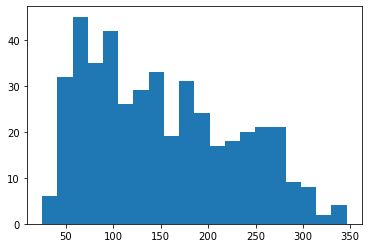

In [24]:
#Draw a histogram of the target 
plt.hist(diabetes_y,bins=20)

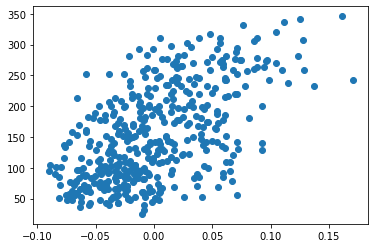

In [25]:
#plot the data
plt.scatter(diabetes_x,diabetes_y)

The points are not all on a line so we should not expect a perfect a result as we got in the last one

In [26]:
#Split the data into a training set and test set
diabetes_x_train, diabetes_x_test, diabetes_y_train, diabetes_y_test = \
train_test_split(diabetes_x, diabetes_y, test_size=0.1, random_state=503)

In [27]:
#The algorithm requires the data as column vectors
diabetes_x_train = diabetes_x_train.reshape(-1,1)
diabetes_y_train = diabetes_y_train.reshape(-1,1)
diabetes_x_test = diabetes_x_test.reshape(-1,1)
diabetes_y_test = diabetes_y_test.reshape(-1,1)

In [28]:
#Create the linear regression object
regr = linear_model.LinearRegression()

In [29]:
#Train the model using the training sets
regr.fit(diabetes_x_train,diabetes_y_train)

LinearRegression()

In [30]:
#Since this is one dimesional we only have the slope and intercept
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [[944.5832624]]
Intercept: 
 [153.62611136]


In [31]:
#Make predictions using the test set
diabetes_y_pred = regr.predict(diabetes_x_test)

In [32]:
print('Mean squared error: %.2f' % mean_squared_error(diabetes_y_test,  diabetes_y_pred))
print('Max error: %.2f' % max_error(diabetes_y_test,  diabetes_y_pred))
print('Coefficient of determination: %.2f' % r2_score(diabetes_y_test,  diabetes_y_pred))

Mean squared error: 5247.69
Max error: 153.10
Coefficient of determination: 0.22


The coefficient of determination is much lower

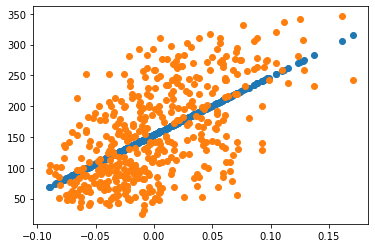

In [33]:
# Drawing the predicted and actual points:
#Actual
plt.scatter(diabetes_x,diabetes_y)
#Predicted
plt.scatter(diabetes_x,diabetes_x*regr.coef_+regr.intercept_)